In [146]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,17,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,35404660,02/02/2017 11:56:03 PM,02/03/2017 01:51:24 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10451,328 EAST 145 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.814810,-73.921825,"(40.8148099628792, -73.92182534717347)"
1,35404661,02/02/2017 03:18:24 PM,03/17/2017 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11421,80-35 89 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688758,-73.860937,"(40.68875760242296, -73.86093696394687)"
2,35404662,02/02/2017 09:14:31 AM,02/06/2017 12:00:00 AM,DOB,Department of Buildings,Elevator,Elevator - Defective/Not Working,NaN,11224,2970 WEST 27 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573588,-73.992855,"(40.57358775088775, -73.99285474116026)"
3,35404664,02/02/2017 10:07:13 PM,02/02/2017 10:38:43 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10029,55 EAST 110 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.796015,-73.947288,"(40.79601481468809, -73.94728791329261)"
4,35404665,02/02/2017 07:56:41 PM,02/02/2017 11:09:23 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10037,2059 MADISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.809081,-73.938196,"(40.80908068595664, -73.93819608404088)"


In [71]:
data.shape

(21242043, 41)

In [74]:
new_data = data.loc[:, ["Unique Key", "Created Date", "Agency", "Complaint Type", "Incident Zip", "Borough", "Latitude", "Longitude"]]

In [ ]:
new_data = data.loc[:, ["Unique Key", "Created Date", "Agency", "Complaint Type", "Incident Zip", "Borough", "Latitude", "Longitude"]]
timestamp = new_data["Created Date"].apply(lambda x: x[0:10])
#new_data["timestamp"] = timestamp
new_data["timestamp"] = pd.to_datetime(timestamp)
new_data = new_data.loc[:, ["timestamp", "Unique Key", "Created Date", "Agency", "Complaint Type", "Incident Zip", "Borough", "Latitude", "Longitude"]]
new_data = new_data.dropna()


In [78]:
timestamp = new_data["Created Date"].apply(lambda x: x[0:10])

In [79]:
new_data["timestamp"] = timestamp

In [84]:
new_data = new_data.loc[:, ["timestamp", "Unique Key", "Created Date", "Agency", "Complaint Type", "Incident Zip", "Borough", "Latitude", "Longitude"]]

In [98]:
new_data.shape

(19252050, 9)

In [87]:
weather = pd.read_csv("weather_NY_2010_2018Nov.csv")

In [90]:
station_table = weather.loc[:, ["StationName", "Latitude", "Longitude"]].groupby("StationName").mean()

In [92]:
station_table.head()

,Latitude,Longitude
StationName,,
ADIRONDACK REGIONAL ARPT,44.385,-74.207
ALBANY INTERNATIONAL AIRPORT,42.747,-73.799
BARCELONA HARBOR,42.346,-79.596
BERGEN POINT,40.639,-74.146
BROOKHAVEN AIRPORT,40.822,-72.869


In [103]:
new_data.iloc[0, [7, 8]].values

array([40.8148099628792, -73.92182534717347], dtype=object)

In [120]:
station_list = []
station_lib = station_table.values
for i in range(new_data.shape[0]):
    try:
        station_list.append( np.square(new_data.iloc[i, [7, 8]].values - station_lib).sum(axis=1).argmin() )
    except:
        station_list.append(np.nan)
    if i % 10000 == 0:
        print("Now runing on:", i)
    if i % 1000000 == 0:
        pd.Series(station_list).to_csv("stations.csv")

Now runing on: 0


C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


Now runing on: 10000
Now runing on: 20000
Now runing on: 30000
Now runing on: 40000
Now runing on: 50000
Now runing on: 60000
Now runing on: 70000
Now runing on: 80000
Now runing on: 90000
Now runing on: 100000
Now runing on: 110000
Now runing on: 120000
Now runing on: 130000
Now runing on: 140000
Now runing on: 150000
Now runing on: 160000
Now runing on: 170000
Now runing on: 180000
Now runing on: 190000
Now runing on: 200000
Now runing on: 210000
Now runing on: 220000
Now runing on: 230000
Now runing on: 240000
Now runing on: 250000
Now runing on: 260000
Now runing on: 270000
Now runing on: 280000
Now runing on: 290000
Now runing on: 300000
Now runing on: 310000
Now runing on: 320000
Now runing on: 330000
Now runing on: 340000
Now runing on: 350000
Now runing on: 360000
Now runing on: 370000
Now runing on: 380000
Now runing on: 390000
Now runing on: 400000
Now runing on: 410000
Now runing on: 420000
Now runing on: 430000
Now runing on: 440000
Now runing on: 450000
Now runing on: 4600

Now runing on: 3620000
Now runing on: 3630000
Now runing on: 3640000
Now runing on: 3650000
Now runing on: 3660000
Now runing on: 3670000
Now runing on: 3680000
Now runing on: 3690000
Now runing on: 3700000
Now runing on: 3710000
Now runing on: 3720000
Now runing on: 3730000
Now runing on: 3740000
Now runing on: 3750000
Now runing on: 3760000
Now runing on: 3770000
Now runing on: 3780000
Now runing on: 3790000
Now runing on: 3800000
Now runing on: 3810000
Now runing on: 3820000
Now runing on: 3830000
Now runing on: 3840000
Now runing on: 3850000
Now runing on: 3860000
Now runing on: 3870000
Now runing on: 3880000
Now runing on: 3890000
Now runing on: 3900000
Now runing on: 3910000
Now runing on: 3920000
Now runing on: 3930000
Now runing on: 3940000
Now runing on: 3950000
Now runing on: 3960000
Now runing on: 3970000
Now runing on: 3980000
Now runing on: 3990000
Now runing on: 4000000
Now runing on: 4010000
Now runing on: 4020000
Now runing on: 4030000
Now runing on: 4040000
Now runing 

Now runing on: 7190000
Now runing on: 7200000
Now runing on: 7210000
Now runing on: 7220000
Now runing on: 7230000
Now runing on: 7240000
Now runing on: 7250000
Now runing on: 7260000
Now runing on: 7270000
Now runing on: 7280000
Now runing on: 7290000
Now runing on: 7300000
Now runing on: 7310000
Now runing on: 7320000
Now runing on: 7330000
Now runing on: 7340000
Now runing on: 7350000
Now runing on: 7360000
Now runing on: 7370000
Now runing on: 7380000
Now runing on: 7390000
Now runing on: 7400000
Now runing on: 7410000
Now runing on: 7420000
Now runing on: 7430000
Now runing on: 7440000
Now runing on: 7450000
Now runing on: 7460000
Now runing on: 7470000
Now runing on: 7480000
Now runing on: 7490000
Now runing on: 7500000
Now runing on: 7510000
Now runing on: 7520000
Now runing on: 7530000
Now runing on: 7540000
Now runing on: 7550000
Now runing on: 7560000
Now runing on: 7570000
Now runing on: 7580000
Now runing on: 7590000
Now runing on: 7600000
Now runing on: 7610000
Now runing 

Now runing on: 10740000
Now runing on: 10750000
Now runing on: 10760000
Now runing on: 10770000
Now runing on: 10780000
Now runing on: 10790000
Now runing on: 10800000
Now runing on: 10810000
Now runing on: 10820000
Now runing on: 10830000
Now runing on: 10840000
Now runing on: 10850000
Now runing on: 10860000
Now runing on: 10870000
Now runing on: 10880000
Now runing on: 10890000
Now runing on: 10900000
Now runing on: 10910000
Now runing on: 10920000
Now runing on: 10930000
Now runing on: 10940000
Now runing on: 10950000
Now runing on: 10960000
Now runing on: 10970000
Now runing on: 10980000
Now runing on: 10990000
Now runing on: 11000000
Now runing on: 11010000
Now runing on: 11020000
Now runing on: 11030000
Now runing on: 11040000
Now runing on: 11050000
Now runing on: 11060000
Now runing on: 11070000
Now runing on: 11080000
Now runing on: 11090000
Now runing on: 11100000
Now runing on: 11110000
Now runing on: 11120000
Now runing on: 11130000
Now runing on: 11140000
Now runing on: 1

Now runing on: 14160000
Now runing on: 14170000
Now runing on: 14180000
Now runing on: 14190000
Now runing on: 14200000
Now runing on: 14210000
Now runing on: 14220000
Now runing on: 14230000
Now runing on: 14240000
Now runing on: 14250000
Now runing on: 14260000
Now runing on: 14270000
Now runing on: 14280000
Now runing on: 14290000
Now runing on: 14300000
Now runing on: 14310000
Now runing on: 14320000
Now runing on: 14330000
Now runing on: 14340000
Now runing on: 14350000
Now runing on: 14360000
Now runing on: 14370000
Now runing on: 14380000
Now runing on: 14390000
Now runing on: 14400000
Now runing on: 14410000
Now runing on: 14420000
Now runing on: 14430000
Now runing on: 14440000
Now runing on: 14450000
Now runing on: 14460000
Now runing on: 14470000
Now runing on: 14480000
Now runing on: 14490000
Now runing on: 14500000
Now runing on: 14510000
Now runing on: 14520000
Now runing on: 14530000
Now runing on: 14540000
Now runing on: 14550000
Now runing on: 14560000
Now runing on: 1

Now runing on: 17580000
Now runing on: 17590000
Now runing on: 17600000
Now runing on: 17610000
Now runing on: 17620000
Now runing on: 17630000
Now runing on: 17640000
Now runing on: 17650000
Now runing on: 17660000
Now runing on: 17670000
Now runing on: 17680000
Now runing on: 17690000
Now runing on: 17700000
Now runing on: 17710000
Now runing on: 17720000
Now runing on: 17730000
Now runing on: 17740000
Now runing on: 17750000
Now runing on: 17760000
Now runing on: 17770000
Now runing on: 17780000
Now runing on: 17790000
Now runing on: 17800000
Now runing on: 17810000
Now runing on: 17820000
Now runing on: 17830000
Now runing on: 17840000
Now runing on: 17850000
Now runing on: 17860000
Now runing on: 17870000
Now runing on: 17880000
Now runing on: 17890000
Now runing on: 17900000
Now runing on: 17910000
Now runing on: 17920000
Now runing on: 17930000
Now runing on: 17940000
Now runing on: 17950000
Now runing on: 17960000
Now runing on: 17970000
Now runing on: 17980000
Now runing on: 1

In [169]:
weather.isnull().apply(sum)/weather.shape[0]

USAF                0.000000
WBAN                0.000000
StationName         0.000000
State               0.000000
Latitude            0.000000
Longitude           0.000000
MeanTemp            0.000000
MinTemp             0.000330
MaxTemp             0.000330
DewPoint            0.243483
Percipitation       0.010070
WindSpeed           0.083166
MaxSustainedWind    0.169181
Gust                0.522954
Rain                0.000000
SnowDepth           0.000000
SnowIce             0.000000
Year                0.000000
Month               0.000000
Day                 0.000000
dtype: float64

In [168]:
weather.head()

,USAF,WBAN,StationName,State,Latitude,Longitude,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce,Year,Month,Day
0,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,27.6,24.8,30.9,25.0,0.07,1.3,6.0,NaN,0,0.0,1,2010,1,1
1,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,-3.2,-20.9,17.1,-9.6,0.00,3.3,9.9,NaN,0,0.0,1,2010,1,10
2,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,20.9,17.1,24.1,15.1,0.00,6.8,12.0,19.0,0,0.0,1,2010,1,11
3,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,13.8,5.0,19.9,8.5,NaN,4.4,8.0,15.9,0,0.0,1,2010,1,12
4,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,6.3,-8.0,19.0,1.9,0.00,3.3,5.1,NaN,0,0.0,1,2010,1,13


In [160]:
from sklearn.impute import SimpleImputer
from scipy import stats

In [161]:
from sklearn.impute import SimpleImputer

In [164]:
imp = SimpleImputer(missing_values=np.nan, fill_value=0)

In [167]:
weather["SnowDepth"] = weather["SnowDepth"].fillna(0)

In [ ]:
meadian_value=train['Age'].median()
train['Age']=train['Age'].fillna(median_value)

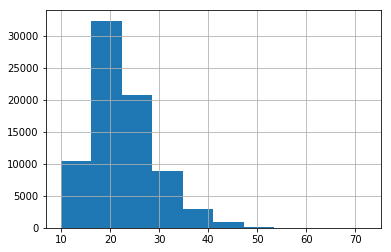

In [147]:
weather["Gust"].hist()

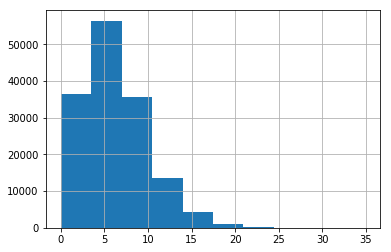

In [153]:
weather["WindSpeed"].hist()

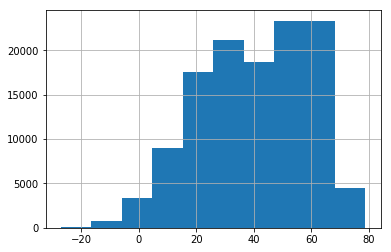

In [152]:
weather["DewPoint"].hist()

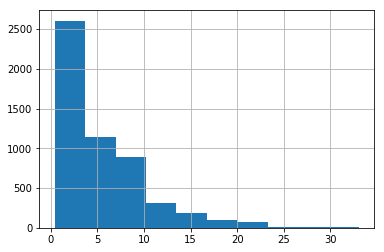

In [155]:
weather["SnowDepth"].hist()

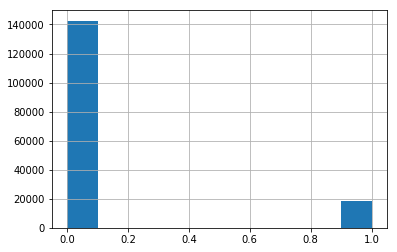

In [156]:
weather["SnowIce"].hist()

In [158]:
weather[weather["SnowIce"]==0]

,USAF,WBAN,StationName,State,Latitude,Longitude,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce,Year,Month,Day
5,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,23.5,19.4,28.4,20.9,0.01,4.7,15.9,17.1,0,NaN,0,2010,1,14
7,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,29.9,28.4,30.9,26.4,0.02,8.3,15.0,22.9,0,NaN,0,2010,1,16
8,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,30.1,21.9,37.0,27.0,0.00,2.0,8.0,NaN,0,NaN,0,2010,1,17
13,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,21.4,10.9,28.0,16.9,0.01,3.6,8.0,14.0,0,NaN,0,2010,1,21
14,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,8.7,-8.0,30.2,1.8,0.00,1.1,7.0,NaN,0,NaN,0,2010,1,22
15,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,9.7,-11.9,35.1,-2.9,0.00,1.1,5.1,NaN,0,NaN,0,2010,1,23
16,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,21.3,5.0,37.9,11.5,0.00,3.3,14.0,NaN,0,NaN,0,2010,1,24
17,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,45.0,36.0,53.1,41.4,0.00,10.5,22.9,40.0,1,NaN,0,2010,1,25
22,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,-7.4,-18.0,9.0,-17.6,0.00,3.4,8.0,NaN,0,NaN,0,2010,1,30
28,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,54.3,50.0,70.0,51.6,2.69,3.7,11.1,26.0,1,NaN,0,2010,10,1


In [276]:
new_data.head()

,timestamp,Unique Key,Created Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude,stations,DewPoint
0,02/02/2017,35404660,02/02/2017 11:56:03 PM,NYPD,Noise - Residential,10451,BRONX,40.814810,-73.921825,26,26
1,02/02/2017,35404661,02/02/2017 03:18:24 PM,DOB,Building/Use,11421,QUEENS,40.688758,-73.860937,26,26
2,02/02/2017,35404662,02/02/2017 09:14:31 AM,DOB,Elevator,11224,BROOKLYN,40.573588,-73.992855,47,47
3,02/02/2017,35404664,02/02/2017 10:07:13 PM,NYPD,Noise - Residential,10029,MANHATTAN,40.796015,-73.947288,39,39
4,02/02/2017,35404665,02/02/2017 07:56:41 PM,NYPD,Noise - Residential,10037,MANHATTAN,40.809081,-73.938196,39,39


In [176]:
weather = pd.read_csv("cleaned_weather.csv")

In [184]:
ff = new_data.loc[:, ["timestamp", "stations", "Unique Key"]].groupby(["timestamp", "stations"]).count()

In [200]:
ff["timestamp"] = ff.index.get_level_values(0)
ff["stations"] = ff.index.get_level_values(1)

In [212]:
ff.index = range(0, ff.shape[0])
ff.columns = ["n_req", "timestamp", "stations"]
ff.head()

,n_req,timestamp,stations
0,112,01/01/2010,3
1,11,01/01/2010,8
2,167,01/01/2010,24
3,85,01/01/2010,25
4,983,01/01/2010,26


In [242]:
ff.shape

(35000, 3)

In [318]:
df = ff.merge(weather, how = "inner", left_on = ["timestamp", "stations"], right_on = ["timestamp_lag1", "index"])

In [313]:
df.head()

,n_req,timestamp_x,stations,Unnamed: 0,USAF,WBAN,StationName,State,Latitude_x,Longitude_x,...,SnowDepth,SnowIce,Year,Month,Day,timestamp_y,Latitude_y,Longitude_y,index,timestamp_lag1
0,170,2011-01-01,3,7796,997272,99999,BERGEN POINT,NY,40.639,-74.146,...,0.0,0,2010,12,31,2010-12-31,40.639,-74.146,3,2011-01-01
1,233,2011-01-01,24,65711,744860,94789,JOHN F KENNEDY INTERNATIONAL AIRPORT,NY,40.639,-73.762,...,7.9,0,2010,12,31,2010-12-31,40.639,-73.762,24,2011-01-01
2,107,2011-01-01,25,68949,997280,99999,KINGS POINT,NY,40.800,-73.770,...,0.0,0,2010,12,31,2010-12-31,40.800,-73.770,25,2011-01-01
3,969,2011-01-01,26,71955,725030,14732,LA GUARDIA AIRPORT,NY,40.779,-73.880,...,5.9,0,2010,12,31,2010-12-31,40.779,-73.880,26,2011-01-01
4,62,2011-01-01,34,93846,725060,94728,NEW YORK CENTRAL PARK,NY,40.779,-73.969,...,14.2,0,2010,12,31,2010-12-31,40.779,-73.969,34,2011-01-01


In [324]:
df.to_csv("df_new.csv")

In [297]:
weather.head()

,Unnamed: 0,USAF,WBAN,StationName,State,Latitude_x,Longitude_x,MeanTemp,MinTemp,MaxTemp,...,SnowDepth,SnowIce,Year,Month,Day,timestamp,Latitude_y,Longitude_y,index,timestamp_lag1
0,0,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,27.6,24.8,30.9,...,0.0,1,2010,1,1,2010-01-01,44.385,-74.207,0,2010-01-02
1,1,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,-3.2,-20.9,17.1,...,0.0,1,2010,1,10,2010-01-10,44.385,-74.207,0,2010-01-11
2,2,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,20.9,17.1,24.1,...,0.0,1,2010,1,11,2010-01-11,44.385,-74.207,0,2010-01-12
3,3,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,13.8,5.0,19.9,...,0.0,1,2010,1,12,2010-01-12,44.385,-74.207,0,2010-01-13
4,4,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,6.3,-8.0,19.0,...,0.0,1,2010,1,13,2010-01-13,44.385,-74.207,0,2010-01-14


In [289]:
weather["timestamp"] = pd.to_datetime(weather["timestamp"])

In [296]:
weather["timestamp_lag1"] = weather["timestamp"] + datetime.timedelta(1)

In [291]:
ff["timestamp"] = pd.to_datetime(ff["timestamp"])

In [292]:
ff.head()

,n_req,timestamp,stations
0,112,2010-01-01,3
1,11,2010-01-01,8
2,167,2010-01-01,24
3,85,2010-01-01,25
4,983,2010-01-01,26


In [319]:
df.shape

(19204, 29)

In [320]:
df.columns

Index(['n_req', 'timestamp_x', 'stations', 'Unnamed: 0', 'USAF', 'WBAN',
       'StationName', 'State', 'Latitude_x', 'Longitude_x', 'MeanTemp',
       'MinTemp', 'MaxTemp', 'DewPoint', 'Percipitation', 'WindSpeed',
       'MaxSustainedWind', 'Gust', 'Rain', 'SnowDepth', 'SnowIce', 'Year',
       'Month', 'Day', 'timestamp_y', 'Latitude_y', 'Longitude_y', 'index',
       'timestamp_lag1'],
      dtype='object')

In [321]:
df = df.drop(columns=['Unnamed: 0', 'timestamp_y', 'USAF', 'WBAN', 'State', 'Latitude_x', 'Longitude_x','Year',
       'Month', 'Day', 'Latitude_y', 'Longitude_y', 'index', 'timestamp_lag1'])

#df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

,n_req,timestamp_x,stations,StationName,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce
0,170,2011-01-01,3,BERGEN POINT,36.7,31.3,44.1,40.134385,0.0,3.2,6.0,11.640780,0,0.0,0
1,233,2011-01-01,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,34.8,30.0,39.9,26.100000,0.0,6.7,12.0,18.998047,0,7.9,0
2,107,2011-01-01,25,KINGS POINT,38.2,34.0,44.4,40.134385,0.0,4.9,8.0,14.154424,0,0.0,0
3,969,2011-01-01,26,LA GUARDIA AIRPORT,40.8,29.1,46.0,26.200000,0.0,5.9,8.0,14.269215,0,5.9,0
4,62,2011-01-01,34,NEW YORK CENTRAL PARK,39.9,35.1,45.0,25.700000,0.0,5.0,15.0,22.280652,0,14.2,0


In [322]:
df = df.sort_values(by = "timestamp_x")

In [323]:
df.head()

,n_req,timestamp_x,stations,StationName,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce
48,134,2010-01-02,3,BERGEN POINT,35.6,33.3,41.2,40.134385,0.00,2.5,7.0,12.719676,0,0.0,0
50,131,2010-01-02,25,KINGS POINT,34.5,32.2,37.9,40.134385,0.00,1.4,2.9,7.840482,0,0.0,0
51,1365,2010-01-02,26,LA GUARDIA AIRPORT,35.1,30.2,39.0,31.500000,0.23,2.8,8.0,13.913363,1,1.2,1
52,361,2010-01-02,39,NYC CENTRAL PARK,35.9,33.1,39.9,32.000000,0.25,2.3,6.0,11.537468,1,0.0,1
49,209,2010-01-02,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,35.1,30.2,41.0,31.600000,0.29,2.4,8.0,13.867447,1,0.0,1


In [266]:
df_target = df.loc[:, ["n_req", "timestamp"]]

In [265]:
df["timestamp"][0:10] - datetime.timedelta(days=7)

0    2009-12-25
1    2009-12-25
2    2009-12-25
3    2009-12-25
4    2009-12-25
52   2009-12-26
53   2009-12-26
54   2009-12-26
51   2009-12-26
50   2009-12-26
Name: timestamp, dtype: datetime64[ns]

In [ ]:
df["laggtime"] = df["timestamp"][0:10] - datetime.timedelta(days=7)

In [279]:
df.to_csv("df.csv")

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline

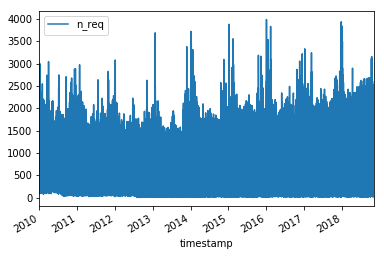

In [273]:
df_target.plot(x = "timestamp", y = "n_req")

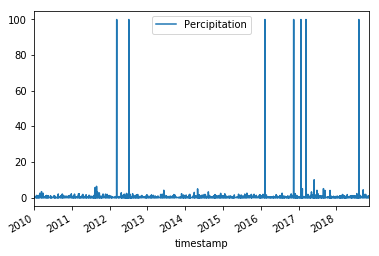

In [275]:
df.plot(x = "timestamp", y = "Percipitation")

In [328]:
new_data.head()

,timestamp,Unique Key,Created Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude,stations,DewPoint
0,02/02/2017,35404660,02/02/2017 11:56:03 PM,NYPD,Noise - Residential,10451,BRONX,40.814810,-73.921825,26,26
1,02/02/2017,35404661,02/02/2017 03:18:24 PM,DOB,Building/Use,11421,QUEENS,40.688758,-73.860937,26,26
2,02/02/2017,35404662,02/02/2017 09:14:31 AM,DOB,Elevator,11224,BROOKLYN,40.573588,-73.992855,47,47
3,02/02/2017,35404664,02/02/2017 10:07:13 PM,NYPD,Noise - Residential,10029,MANHATTAN,40.796015,-73.947288,39,39
4,02/02/2017,35404665,02/02/2017 07:56:41 PM,NYPD,Noise - Residential,10037,MANHATTAN,40.809081,-73.938196,39,39


In [362]:
df_type = new_data.loc[:, ["timestamp", "stations", "Complaint Type",  "Unique Key"]].groupby(["timestamp", "stations", "Complaint Type"]).count()

In [363]:
df_type["timestamp"] = df_type.index.get_level_values(0)
df_type["stations"] = df_type.index.get_level_values(1)
df_type["Complaint"] = df_type.index.get_level_values(2)

In [367]:
df_type.index = range(0, df_type.shape[0])

In [364]:
#df_type = df_type.set_index("Complaint")

In [368]:
df_type[0:20]

,Unique Key,timestamp,stations,Complaint
0,9,01/01/2010,3,Blocked Driveway
1,2,01/01/2010,3,Derelict Vehicle
2,2,01/01/2010,3,Dirty Conditions
3,4,01/01/2010,3,GENERAL CONSTRUCTION
4,1,01/01/2010,3,General Construction/Plumbing
5,8,01/01/2010,3,HEATING
6,7,01/01/2010,3,Missed Collection (All Materials)
7,3,01/01/2010,3,NONCONST
8,3,01/01/2010,3,New Tree Request
9,2,01/01/2010,3,Noise


In [370]:
df_comp = df_type.groupby(["timestamp", "stations"]).max()

In [373]:
df_comp["timestamp"] = df_comp.index.get_level_values(0)
df_comp["stations"] = df_comp.index.get_level_values(1)


In [375]:
df_comp.index = range(0, df_comp.shape[0])

In [381]:
df_comp["timestamp"] = pd.to_datetime(df_comp["timestamp"])

In [382]:
df_comp.head()

,Unique Key,Complaint,timestamp,stations
0,19,Water System,2010-01-01,3
1,5,Water System,2010-01-01,8
2,35,Water System,2010-01-01,24
3,18,Water System,2010-01-01,25
4,310,Water System,2010-01-01,26


In [326]:
weather.head()

,Unnamed: 0,USAF,WBAN,StationName,State,Latitude_x,Longitude_x,MeanTemp,MinTemp,MaxTemp,...,SnowDepth,SnowIce,Year,Month,Day,timestamp,Latitude_y,Longitude_y,index,timestamp_lag1
0,0,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,27.6,24.8,30.9,...,0.0,1,2010,1,1,2010-01-01,44.385,-74.207,0,2010-01-02
1,1,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,-3.2,-20.9,17.1,...,0.0,1,2010,1,10,2010-01-10,44.385,-74.207,0,2010-01-11
2,2,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,20.9,17.1,24.1,...,0.0,1,2010,1,11,2010-01-11,44.385,-74.207,0,2010-01-12
3,3,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,13.8,5.0,19.9,...,0.0,1,2010,1,12,2010-01-12,44.385,-74.207,0,2010-01-13
4,4,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,6.3,-8.0,19.0,...,0.0,1,2010,1,13,2010-01-13,44.385,-74.207,0,2010-01-14


In [377]:
#ff.to_csv("ff.csv")

In [384]:
df_n = df_comp.merge(weather, how = "inner", left_on = ["timestamp", "stations"], right_on = ["timestamp_lag1", "index"])

In [386]:
df_n.columns

Index(['Unique Key', 'Complaint', 'timestamp_x', 'stations', 'Unnamed: 0',
       'USAF', 'WBAN', 'StationName', 'State', 'Latitude_x', 'Longitude_x',
       'MeanTemp', 'MinTemp', 'MaxTemp', 'DewPoint', 'Percipitation',
       'WindSpeed', 'MaxSustainedWind', 'Gust', 'Rain', 'SnowDepth', 'SnowIce',
       'Year', 'Month', 'Day', 'timestamp_y', 'Latitude_y', 'Longitude_y',
       'index', 'timestamp_lag1'],
      dtype='object')

In [388]:
df_n = df_n.drop(columns=['Unnamed: 0', 'timestamp_y', 'USAF', 'WBAN', 'State', 'Latitude_x', 'Longitude_x','Year',
       'Month', 'Day', 'Latitude_y', 'Longitude_y', 'index', 'timestamp_lag1'])


In [392]:
df_n = df_n.sort_values(by = "timestamp_x")

In [393]:
df_n.head()

,Unique Key,Complaint,timestamp_x,stations,StationName,MeanTemp,MinTemp,MaxTemp,DewPoint,Percipitation,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce
48,21,Water System,2010-01-02,3,BERGEN POINT,35.6,33.3,41.2,40.134385,0.00,2.5,7.0,12.719676,0,0.0,0
50,28,Water System,2010-01-02,25,KINGS POINT,34.5,32.2,37.9,40.134385,0.00,1.4,2.9,7.840482,0,0.0,0
51,576,Window Guard,2010-01-02,26,LA GUARDIA AIRPORT,35.1,30.2,39.0,31.500000,0.23,2.8,8.0,13.913363,1,1.2,1
52,187,Water System,2010-01-02,39,NYC CENTRAL PARK,35.9,33.1,39.9,32.000000,0.25,2.3,6.0,11.537468,1,0.0,1
49,56,Water System,2010-01-02,24,JOHN F KENNEDY INTERNATIONAL AIRPORT,35.1,30.2,41.0,31.600000,0.29,2.4,8.0,13.867447,1,0.0,1


In [400]:

import datetime
from collections import Counter

Counter(df_n["Complaint"])

Counter({'Water System': 16443,
         'Window Guard': 703,
         'Traffic/Illegal Parking': 5,
         'Water Conservation': 83,
         'Unsanitary Animal Pvt Property': 43,
         'Water Quality': 81,
         'X-Ray Machine/Equipment': 44,
         'Vending': 272,
         'Urinating in Public': 17,
         'Traffic Signal Condition': 175,
         'Violation of Park Rules': 40,
         'Vacant Lot': 10,
         'Taxi Complaint': 390,
         'Senior Center Complaint': 1,
         'Street Light Condition': 18,
         'Street Sign - Dangling': 5,
         'Unleashed Dog': 23,
         'Unsanitary Pigeon Condition': 22,
         'Unsanitary Animal Facility': 4,
         'Sweeping/Missed-Inadequate': 4,
         'Traffic': 45,
         'Street Sign - Damaged': 14,
         'Street Condition': 148,
         'Street Sign - Missing': 9,
         'Transportation Provider Complaint': 2,
         'Special Projects Inspection Team (SPIT)': 7,
         'Rodent': 18,
         'S

In [416]:
def filter_fun(string):
    if string.lower() == 'water system' or  string.lower() == "plumb":
        return string.lower()
    elif 'water' in string.lower():
        return 'other water'
    elif 'animal' in string.lower() or 'dog' in string.lower() or 'rodent' in string.lower():
        return 'animal'
    elif 'noise' in string.lower():
        return 'noise'
    elif string == 'Window Guard':
        return string.lower()
    elif string =='Taxi Complaint' or string == 'Taxi Report':
        return 'Taxi'
    elif "street" in string.lower() or "traffic" in string.lower() or "park" in string.lower():
        return "traffic"
    elif "sanitary" in string.lower() or "sanitation" in string.lower():
        return "sanitary"
    elif "vend" in string.lower():
        return "vent"
    else:
        return "other"

In [418]:
df_n["Complaint"] = df_n["Complaint"].apply(filter_fun)

In [420]:
Counter(df_n["Complaint"])

Counter({'water system': 16443,
         'window guard': 703,
         'traffic': 459,
         'other water': 396,
         'animal': 89,
         'other': 128,
         'vent': 272,
         'Taxi': 430,
         'sanitary': 273,
         'noise': 11})

In [423]:
df_n.to_csv("df_n.csv")

In [219]:
weather = weather.merge(station_table, on="StationName")

In [220]:
weather.head()

,Unnamed: 0,USAF,WBAN,StationName,State,Latitude_x,Longitude_x,MeanTemp,MinTemp,MaxTemp,...,Rain,SnowDepth,SnowIce,Year,Month,Day,timestamp,Latitude_y,Longitude_y,index
0,0,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,27.6,24.8,30.9,...,0,0.0,1,2010,1,1,01/01/2010,44.385,-74.207,0
1,1,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,-3.2,-20.9,17.1,...,0,0.0,1,2010,1,10,01/10/2010,44.385,-74.207,0
2,2,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,20.9,17.1,24.1,...,0,0.0,1,2010,1,11,01/11/2010,44.385,-74.207,0
3,3,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,13.8,5.0,19.9,...,0,0.0,1,2010,1,12,01/12/2010,44.385,-74.207,0
4,4,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,6.3,-8.0,19.0,...,0,0.0,1,2010,1,13,01/13/2010,44.385,-74.207,0


In [140]:
station_table.head()

,Latitude,Longitude,index
StationName,,,
ADIRONDACK REGIONAL ARPT,44.385,-74.207,0
ALBANY INTERNATIONAL AIRPORT,42.747,-73.799,1
BARCELONA HARBOR,42.346,-79.596,2
BERGEN POINT,40.639,-74.146,3
BROOKHAVEN AIRPORT,40.822,-72.869,4


In [175]:
new_data.head()

,timestamp,Unique Key,Created Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude,stations,DewPoint
0,02/02/2017,35404660,02/02/2017 11:56:03 PM,NYPD,Noise - Residential,10451,BRONX,40.814810,-73.921825,26,26
1,02/02/2017,35404661,02/02/2017 03:18:24 PM,DOB,Building/Use,11421,QUEENS,40.688758,-73.860937,26,26
2,02/02/2017,35404662,02/02/2017 09:14:31 AM,DOB,Elevator,11224,BROOKLYN,40.573588,-73.992855,47,47
3,02/02/2017,35404664,02/02/2017 10:07:13 PM,NYPD,Noise - Residential,10029,MANHATTAN,40.796015,-73.947288,39,39
4,02/02/2017,35404665,02/02/2017 07:56:41 PM,NYPD,Noise - Residential,10037,MANHATTAN,40.809081,-73.938196,39,39


In [178]:
new_data[0:10].merge()

,timestamp,Unique Key,Created Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude,stations,DewPoint
0,02/02/2017,35404660,02/02/2017 11:56:03 PM,NYPD,Noise - Residential,10451,BRONX,40.814810,-73.921825,26,26
1,02/02/2017,35404661,02/02/2017 03:18:24 PM,DOB,Building/Use,11421,QUEENS,40.688758,-73.860937,26,26
2,02/02/2017,35404662,02/02/2017 09:14:31 AM,DOB,Elevator,11224,BROOKLYN,40.573588,-73.992855,47,47
3,02/02/2017,35404664,02/02/2017 10:07:13 PM,NYPD,Noise - Residential,10029,MANHATTAN,40.796015,-73.947288,39,39
4,02/02/2017,35404665,02/02/2017 07:56:41 PM,NYPD,Noise - Residential,10037,MANHATTAN,40.809081,-73.938196,39,39
5,02/02/2017,35404666,02/02/2017 01:14:19 PM,HPD,WATER LEAK,11226,BROOKLYN,40.638219,-73.955815,47,47
6,02/03/2017,35404667,02/03/2017 01:15:46 AM,NYPD,Noise - Vehicle,10031,MANHATTAN,40.830396,-73.948077,39,39
7,02/03/2017,35404668,02/03/2017 12:34:10 AM,NYPD,Noise - Street/Sidewalk,10040,MANHATTAN,40.861461,-73.929218,39,39
8,02/03/2017,35404669,02/03/2017 12:59:31 AM,NYPD,Noise - Commercial,10034,MANHATTAN,40.863852,-73.925231,39,39
9,02/02/2017,35404672,02/02/2017 10:27:37 PM,NYPD,Noise - Residential,10452,BRONX,40.837755,-73.925322,39,39


In [139]:
station_table["index"] = range(0, station_table.shape[0])

In [137]:
new_data.head()

,timestamp,Unique Key,Created Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude,stations
0,02/02/2017,35404660,02/02/2017 11:56:03 PM,NYPD,Noise - Residential,10451,BRONX,40.814810,-73.921825,26
1,02/02/2017,35404661,02/02/2017 03:18:24 PM,DOB,Building/Use,11421,QUEENS,40.688758,-73.860937,26
2,02/02/2017,35404662,02/02/2017 09:14:31 AM,DOB,Elevator,11224,BROOKLYN,40.573588,-73.992855,47
3,02/02/2017,35404664,02/02/2017 10:07:13 PM,NYPD,Noise - Residential,10029,MANHATTAN,40.796015,-73.947288,39
4,02/02/2017,35404665,02/02/2017 07:56:41 PM,NYPD,Noise - Residential,10037,MANHATTAN,40.809081,-73.938196,39


In [136]:
new_data["stations"] = station_np

C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
len(station_list)

19252050

In [124]:
station_np = np.array(station_list)

In [125]:
np.save("station_np",station_np)

In [126]:
ss = np.load("../Documents/station_np/station_np.npy")

In [130]:
np.all(ss == station_np)

True

In [122]:
pd.Series(station_list).to_csv("stations.csv")

C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [123]:
station_csv = pd.read_csv("stations.csv")

In [9]:
small_data = data[0:5000]

In [12]:
small_data.describe()

,Unique Key,BBL,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,5.000000e+03,3.583000e+03,4.453000e+03,4453.000000,4453.000000,4453.000000
mean,3.540802e+07,2.859739e+09,1.003128e+06,200078.990344,40.715792,-73.931851
std,1.977364e+03,1.199981e+09,2.470540e+04,30466.750983,0.083623,0.089084
min,3.540466e+07,0.000000e+00,9.141620e+05,121250.000000,40.499226,-74.252032
25%,3.540629e+07,2.031170e+09,9.892590e+05,176773.000000,40.651791,-73.981958
50%,3.540801e+07,3.040480e+09,1.001353e+06,198582.000000,40.711738,-73.938316
75%,3.540974e+07,4.018840e+09,1.018287e+06,219821.000000,40.770027,-73.877012
max,3.541268e+07,5.080460e+09,1.066773e+06,269998.000000,40.907711,-73.702184


In [45]:
import datetime
print(datetime.datetime.now())

2019-08-02 15:06:37.835510


In [49]:
pd.to_datetime(small_data["Created Date"][0]).year

2017

In [67]:
small_data["Created Date"][0:10]

0    02/02/2017 11:56:03 PM
1    02/02/2017 03:18:24 PM
2    02/02/2017 09:14:31 AM
3    02/02/2017 10:07:13 PM
4    02/02/2017 07:56:41 PM
5    02/02/2017 01:14:19 PM
6    02/03/2017 01:15:46 AM
7    02/03/2017 12:34:10 AM
8    02/03/2017 12:59:31 AM
9    02/02/2017 10:27:37 PM
Name: Created Date, dtype: object

In [68]:
small_data.shape

(500000, 41)

In [69]:
small_data["Created Date"].apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y %I:%M:%S %p"))

0        2017-02-02 23:56:03
1        2017-02-02 15:18:24
2        2017-02-02 09:14:31
3        2017-02-02 22:07:13
4        2017-02-02 19:56:41
5        2017-02-02 13:14:19
6        2017-02-03 01:15:46
7        2017-02-03 00:34:10
8        2017-02-03 00:59:31
9        2017-02-02 22:27:37
10       2017-02-03 00:42:44
11       2017-02-02 08:11:07
12       2017-02-02 05:50:46
13       2017-02-02 13:25:12
14       2017-02-02 06:52:27
15       2017-02-02 17:28:39
16       2017-02-02 09:45:47
17       2017-02-02 14:44:32
18       2017-02-02 10:24:31
19       2017-02-02 12:39:38
20       2017-02-02 10:52:00
21       2017-02-03 00:45:07
22       2017-02-02 13:32:57
23       2017-02-02 19:39:25
24       2017-02-02 21:57:12
25       2017-02-02 20:07:22
26       2017-02-02 17:12:52
27       2017-02-02 14:32:00
28       2017-02-02 13:40:06
29       2017-02-02 17:45:15
                 ...        
499970   2017-04-28 18:29:30
499971   2017-04-28 16:15:39
499972   2017-04-29 00:17:37
499973   2017-

In [51]:
small_data["Created Date"].apply(lambda x: x.date())

AttributeError: 'str' object has no attribute 'date'

In [31]:
import geopy.distance

coords_1 = np.array( [52.2296756, 21.0122287] )
coords_2 = np.array( [52.406374, 16.9251681] )

print(geopy.distance.vincenty(coords_1, coords_2).km)
print(np.square(coords_1 - coords_2).sum())

coords_1 = np.array( [51.2296756, 21.0122287] )
coords_2 = np.array( [51.406374, 16.9251681] )

print(geopy.distance.vincenty(coords_1, coords_2).km)
print(np.square(coords_1 - coords_2).sum())

279.35290160386563
16.735286672634928
285.57637083323004
16.735286672634928


C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  
C:\Users\xiangyangcao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if sys.path[0] == '':


In [29]:
np.square(coords_1 - coords_2).sum()

16.735286672634928

In [ ]:
data.describe()